<div style="border:solid green 2px; padding: 20px">
    
<b>Андрей, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
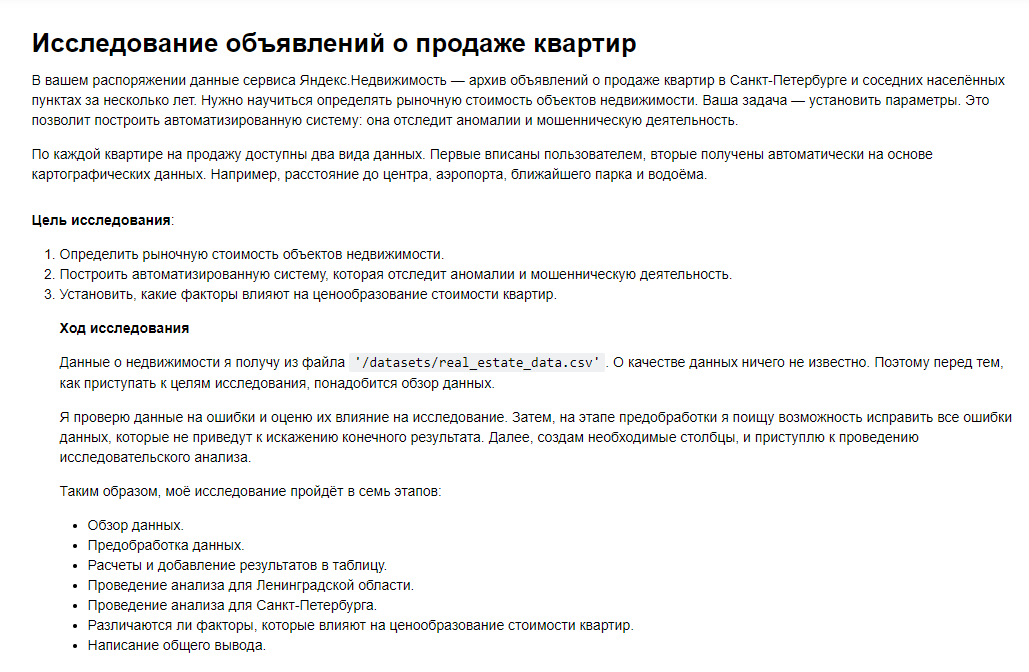
</div>

### Откройте файл с данными и изучите общую информацию. 

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

In [1]:
import pandas as pd
import matplotlib. pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

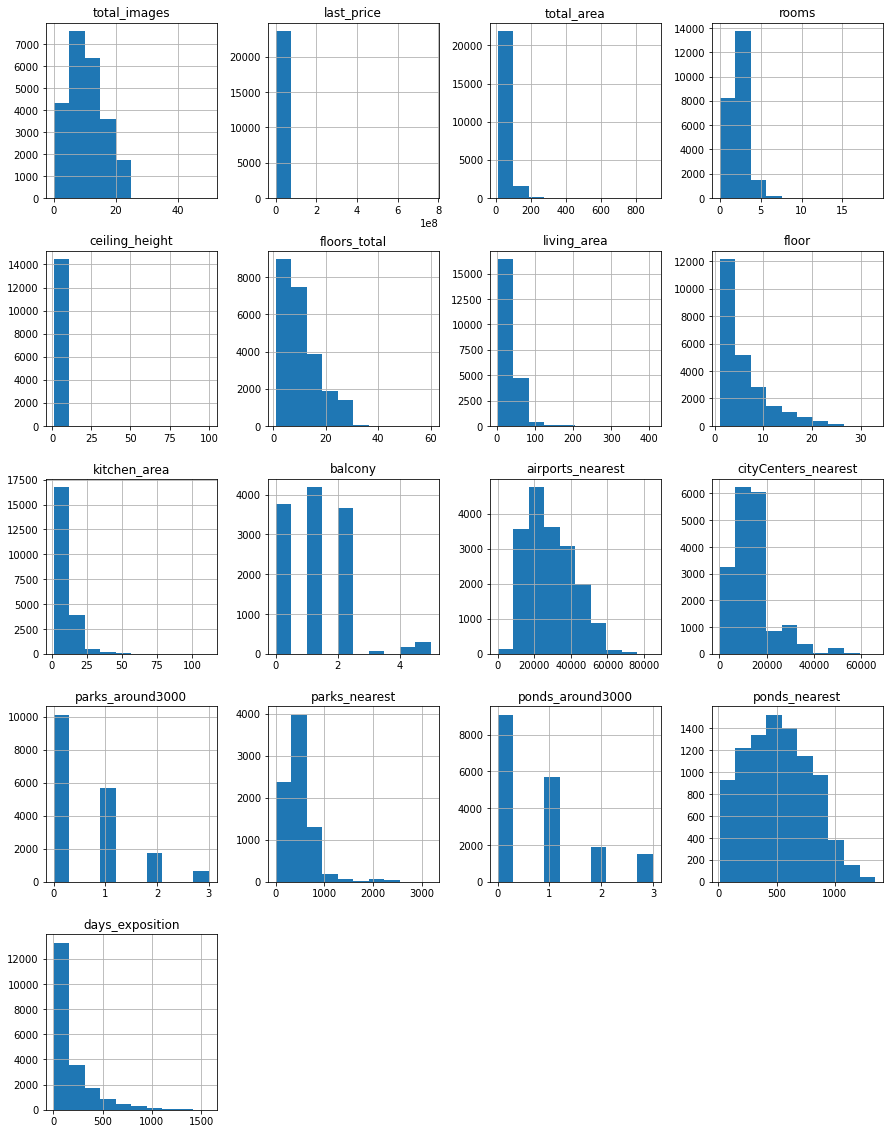

In [5]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

### Предобработка данных

In [6]:
# 1. Ищем пропущенные значения.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

In [7]:
# Заполняем пропущенные значения.
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Если пропусков меньше 5% их лучше сразу удалить, дабы сэкономить время

Пустые значения в столбце 'balcony' заменены на 0, скорее всего пользователь просто не указал, есть ли балкон. Пустые значения в столбце 'is_apartment' заменены на False - скорее всего, если ползователь не указал, что это апартаменты, то эта обычная квартира.

In [8]:
# 2. Рассмотрим типы данных в столбцах.
data.info()
# поменяем тип данных в столбце 'floors_total' с float на int
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбце 'floors_total' данные были в десятичном формате, поменяли на целочисленный.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Не обязательно заполнять все пропуски. Замена пропусков должна быть или рациональной, или оставить их. Изменить тип данных с пропусками можно вот так:
    
    data[''] = data[''].astype('Int64', errors='ignore')
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Не все столбцы имеют корректный тип данных. Например `balcony` имеет дробный тип. Но ведь не может быть 1.5 балкона в доме. Как думаешь?
</div>

In [9]:
# поменяем тип данных в столбце 'balcony' с float на int
data['balcony'] = data['balcony'].astype('Int64', errors='ignore')

<div class="alert alert-info"> <b></b> Изменен тип данных в столбце 'balcony'.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Всё верно)
</div>

In [10]:
# 3. Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.
data['locality_name'].unique()
data['locality_name'].nunique()

364

In [11]:
# заменяем "посёлок", "поселок городского типа" и "городской поселок" на "поселок", чтобы уменьшить число уникальных значений.
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].astype(str)
data['locality_name'].nunique()

323

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код
</div>

In [12]:
# 4. Находим и устраняем редкие и выбивающиеся значения.
# заменяем слишком выдающиеся значения в столбце 'ceiling_height' на медианное значение.
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'].median()
# заменяем слишком выдающиеся значения в столбце 'kitchen_area' на медианное значение.
data.loc[data['kitchen_area'] > 20, 'kitchen_area'] = data['kitchen_area'].median()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Здорово, что не хардкодишь, а используешь условие
</div>

Заменили слишком выдающиеся значения в столбцах 'ceiling_height'(больше 10 метров) и 'kitchen_area'(больше 20 квадратных метров) на медианные значения этих столбцов.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует проверка на явные дубликаты, поправишь, пожалуйста?
    
---
    
Так же отсутствует вывод после раздела (можно описать качество исходных данных). Поправишь, этот момент в проекте?
</div>

In [13]:
# Проверяем датасет на наличие явных дубликатов
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Проверка на дубликаты - основа предобработки данных
</div>

<div class="alert alert-info"> <b>Вывод по предобработке данных: </b>Качество исходных данных довольно высокое. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Явных дубликатов нет. Были заполнины пропуски там, где это логически оправдано. Изменен тип данных в нескольких столбцах с десятичного на целочисленный. Сокращено число уникальных типов населенных пунктов. Слишком выдающиеся колличественные значения заменены на медианные.  </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
# Создание сталбца с ценой за квадратный метр.
data['one_metre_price'] = data['last_price'] / data['total_area']

In [15]:
# Создание столбца с днем недели объявления (0 - понедельник, 1 - вторник и тд).
data['week_day'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data['week_day'] = data['week_day'].dt.dayofweek

In [16]:
# Создание сталбца с месяцем, в котором сделано объявление.
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [17]:
# Создание сталбца с годом, в котором сделано объявление.
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [18]:
# Создание столбца с категорией этажа.
data['category_floor'] = 'другой'
data.loc[data['floor'] == 1, 'category_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'category_floor'] = 'последний'

In [19]:
# Создание столбца с расстояние до центра в км.
data['city_centre_km'] = (data['cityCenters_nearest'] / 1000).round()

In [20]:
# Проверяем наличие созданных столбцов.
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metre_price,week_day,month_publication,year_publication,category_floor,city_centre_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

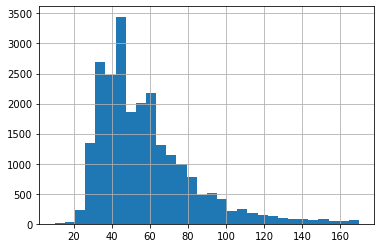

In [21]:
data['total_area'].hist(bins=30, range=(10, 170))
plt.show()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал сократить range и тогда мы сможем увидеть пиковые значения. 
</div>

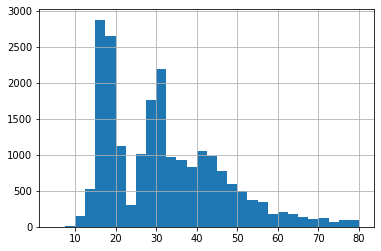

In [22]:
data['living_area'].hist(bins=30, range=(5, 80))
plt.show()

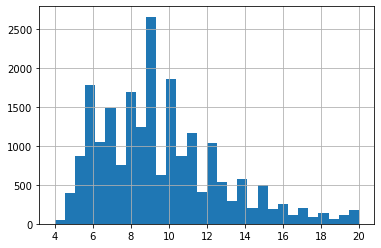

In [23]:
data['kitchen_area'].hist(bins=30, range=(4, 20))
plt.show()

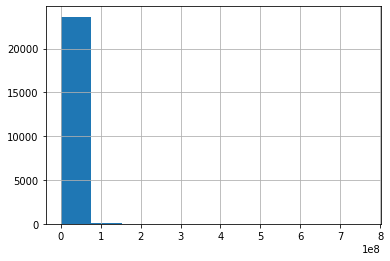

In [24]:
data['last_price'].hist()
plt.show()

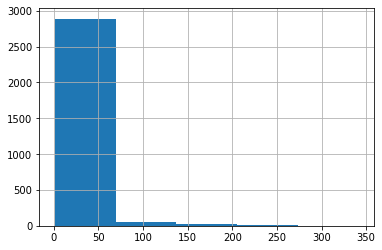

In [25]:
last_price = data['last_price'].value_counts()
last_price.hist(bins=5)
plt.show()

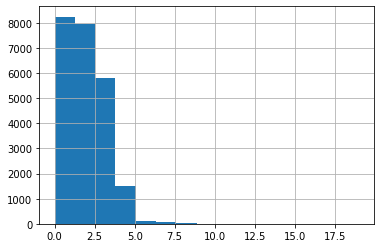

In [26]:
data['rooms'].hist(bins=15)
plt.show()

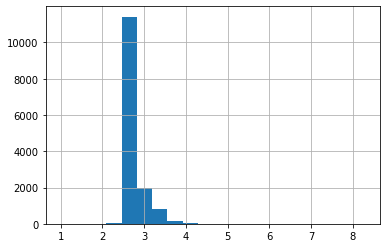

In [27]:
data['ceiling_height'].hist(bins=20)
plt.show()

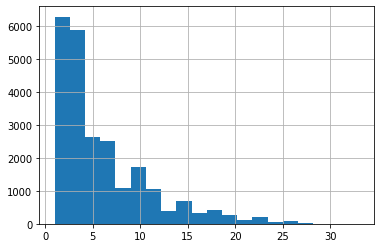

In [28]:
data['floor'].hist(bins=20)
plt.show()

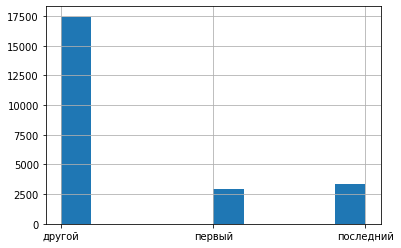

In [29]:
data['category_floor'].hist()
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

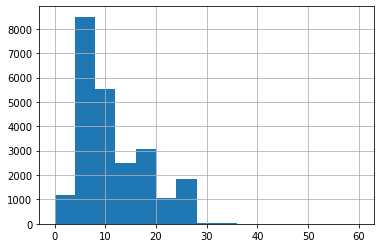

In [30]:
data['floors_total'].hist(bins=15)
plt.show()

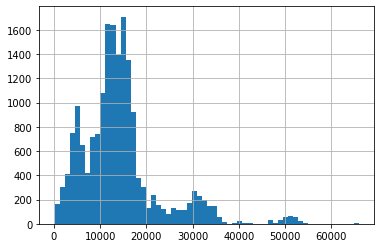

In [31]:
data['cityCenters_nearest'].hist(bins=60)
plt.show()

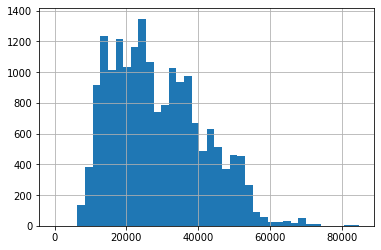

In [32]:
data['airports_nearest'].hist(bins=40)
plt.show()

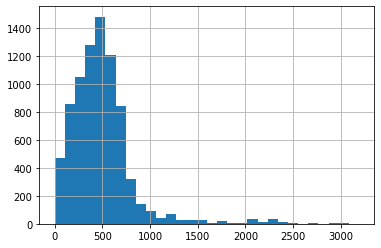

In [33]:
data['parks_nearest'].hist(bins=30)
plt.show()

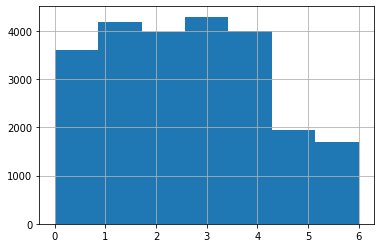

In [34]:
data['week_day'].hist(bins=7)
plt.show()

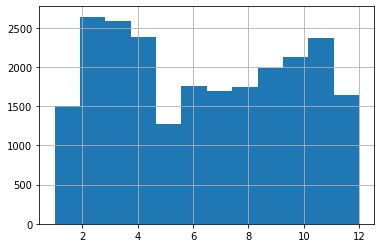

In [35]:
data['month_publication'].hist(bins=12)
plt.show()

Какие наблюдения можно сделать? Общая площадь чаще всего в районе 40-50ти метров, жилая - 25 метров, площадь кухни - 9 метров. Основной массив цен - до 6 миллионов. Большинство объявлений с однокомнатными квартирами, далее идут 2х, 3х и 4х комнатные квартиры. Высота потолка чаще всего - 2.5 метров. Этаж чаще всего 2 или 3ий, большинство предложений сосредоточены на промежуточных этажах, не первом и не последнем. По общему колличеству этажей видно, что большинство объявлений в 5-этажных домах. Большинство объявлений говорят о близости парков в 500 метрах, аэропортов в 20000, центра города в 10-15 км. Чаще размещают объявления в будние дни. Также видно снижение активности в январе (из-за новогодних праздников), мае (вероятно из-за майских праздников) и летних месяцах. Пики приходятся на февраль-апрель и сентябрь-ноябрь. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Лучше после каждого раздела, графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи - так проще читать проект, поскольку будущим коллегам или заказчику не надо будет самим интерпретировать результаты каждого раздела, теста или графика.

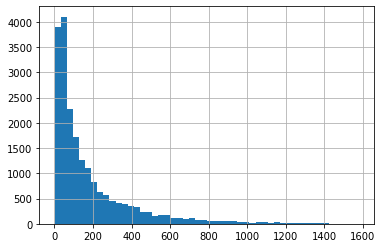

In [36]:
# 2. Изучим, как быстро продавались квартиры.
data['days_exposition'].hist(bins=50)
plt.show()

In [37]:
# считаем среднее значение дней до продажи.
data['days_exposition'].mean()

180.88863436982163

In [38]:
# считаем медианное значение дней до продажи.
data['days_exposition'].median()

95.0

In [39]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Продажа обычно занимает около 100 дней (медиана), аномально долгие продажи сильно влияют на среднее арефметическое число дней продажи (180 дней). Быстрыми можно считать продажи меньше 50 дней, необычайно долгими можно считать продажи больше 250 дней

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, чтобы ответить на вопрос "Какие продажи можно считать быстрыми, а какие — необычно долгими?" лучше посмотреть на распределение данных с помощью boxplot() или describe().
</div>

<div class="alert alert-info"> <b>Вывод: </b>Стандартное отклонение очень высокое, это значит, что в наборе данных могут быть серьезные аномалии или выбросы. И действительно, на графике видно, что есть объявления находящиеся в активном состоянии больше 1000 дней, а максимальное значение вообще - 1580 дней. Именно поэтому медианное значение (2ой квартиль (50%) - 95) так сильно отличается от среднего арефмитического (mean - 180). Примем за быстрые продажи те, которые находятся в пределах 1го квартиля (25%) - до 45 дней, за необычно долгие - те, которые находятся за 3им квартилем (75%) больше 230 дней. </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Да, до 1.5 месяцев можно назвать быстрой продажей
</div>

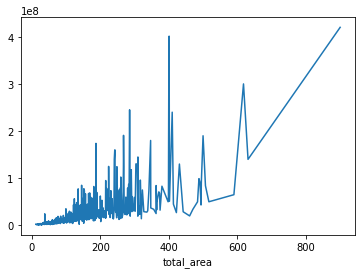

In [40]:
# 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
price_total_area = data.groupby('total_area')['last_price'].mean()
price_total_area.plot()
plt.show()

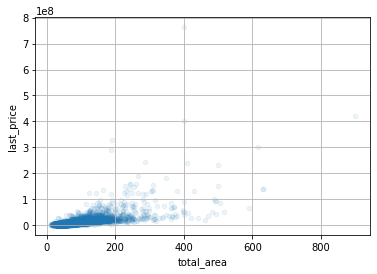

In [41]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.08, grid=True)
plt.show()

In [42]:
# Находим коэффициент Пирсона.
data['total_area'].corr(data['last_price'])

0.6536750579657242

<div class="alert alert-info"> <b>Вывод: </b>Коэффициент Пирсона положительный и высокий, это значит, что присутствует довольно высокая положительная корреляция - линейная зависимость, чем больше площадь, тем больше цена. Основной массив объявлений примерно до 240 квадратных метров. </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, зависимость непрерывных данных данных (в нашем случае это площади) рассматриваются через тип графика scatter. Поправишь, пожалуйста, этот момент в разделе?
   
---
    
Так же графики зависимостей лучше подкрепить корреляцией Пирсона и сразу интерпретировать полученные данные
</div>

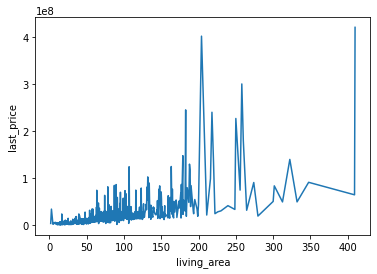

In [43]:
price_living_area = data.groupby('living_area')['last_price'].mean()
sns.lineplot(data=price_living_area)
plt.show()

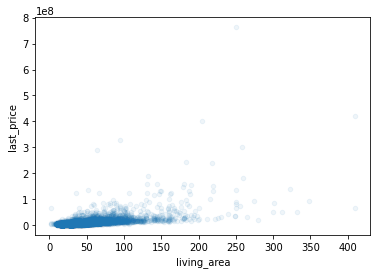

In [44]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.07)
plt.show()

In [45]:
# Находим коэффициент Пирсона.
data['living_area'].corr(data['last_price'])

0.5664915336952651

<div class="alert alert-info"> <b>Вывод: </b>С жилой площадью линейная зависимость не такая выраженная. Коэффициент Пирсона - 0.56. Основной массив объявлений - с жилой площадью до 120 квадратных метра. на граффике видны выбросы - эксклюзивные дорогие предложения с большой площадью. </div>

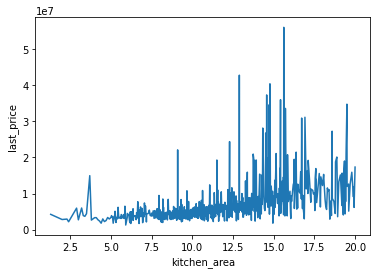

In [46]:
price_kitchen_area = data.groupby('kitchen_area')['last_price'].mean()
sns.lineplot(data=price_kitchen_area)
plt.show()

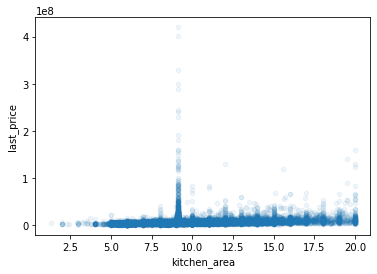

In [47]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.07)
plt.show()

In [48]:
# Находим коэффициент Пирсона.
data['kitchen_area'].corr(data['last_price'])

0.2158334058618978

<div class="alert alert-info"> <b>Вывод: </b>Коэффициент Пирсона очень низкий, значит линейная зависимость отсутствует. Площадь кухни практически не влияет на цену квартиры. </div> 

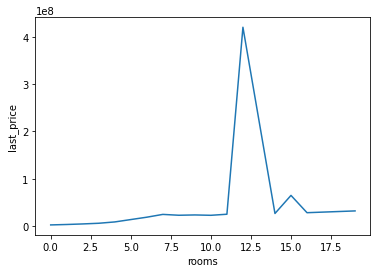

In [49]:
price_rooms = data.groupby('rooms')['last_price'].median()
sns.lineplot(data=price_rooms)
plt.show()

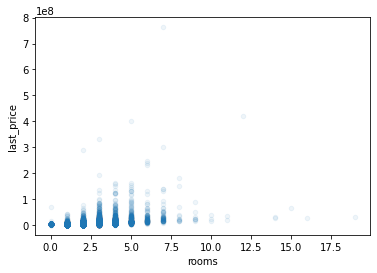

In [50]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.07)
plt.show()

In [51]:
# Находим коэффициент Пирсона.
data['rooms'].corr(data['last_price'])

0.3633428499648948

<div class="alert alert-info"> <b>Вывод: </b>При увеличении комнат с 1 до 3 цена растет, после - увеличение числа комнат уже не так влияет на цену.</div> 

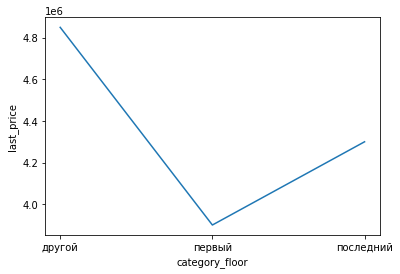

In [52]:
price_floor = data.groupby('category_floor')['last_price'].median()
sns.lineplot(data=price_floor)
plt.show()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

А если сгруппировать по медиане?
</div>

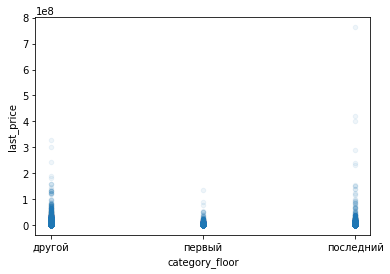

In [53]:
data.plot(x='category_floor', y='last_price', kind='scatter', alpha=0.07)
plt.show()

<div class="alert alert-info"> <b>Вывод: </b>Цена в среднем ниже в объявлениях с первым этажом.  </div> 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Тут ты повторяешь шаг 4.1 (смотришь кол-во объяснлений). А нам нужна зависимость
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по дню, месяцу, году. Добавь, пожалуйста
</div>

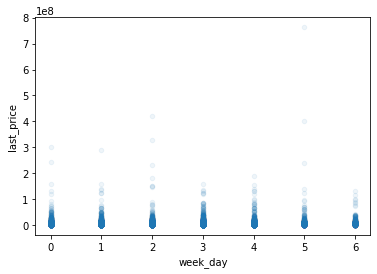

In [54]:
data.plot(x='week_day', y='last_price', kind='scatter', alpha=0.07)
plt.show()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Зависимости прерывных данных (тип этажа, месяц, комнаты) лучше рассмотреть на линейной или столбчатой диаграмме (сгруппировав предварительно)
</div>

In [55]:
# Находим коэффициент Пирсона.
data['week_day'].corr(data['last_price'])

0.0015501452176215405

<div class="alert alert-info"> <b>Вывод: </b>Коэффициент Пирсона близок к нулю, корреляция между днем недели подачи объявления и ценой отсутствует. То же верно для месяца и года. </div> 

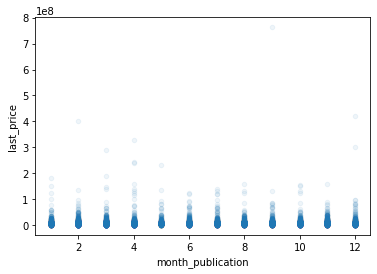

In [56]:
data.plot(x='month_publication', y='last_price', kind='scatter', alpha=0.07)
plt.show()

In [57]:
# Находим коэффициент Пирсона.
data['month_publication'].corr(data['last_price'])

0.0027791287507397166

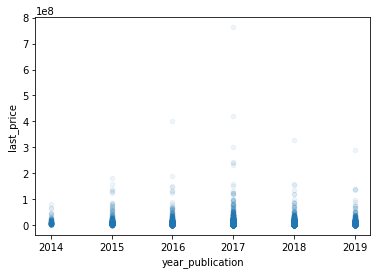

In [58]:
data.plot(x='year_publication', y='last_price', kind='scatter', alpha=0.07)
plt.show()

In [59]:
# Находим коэффициент Пирсона.
data['year_publication'].corr(data['last_price'])

-0.043089036199508615

In [60]:
# 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
data.pivot_table(index='locality_name', values='one_metre_price', aggfunc=['count', 'median'])\
.sort_values([('count', 'one_metre_price')], ascending=False)\
.head(10)

,count,median
,one_metre_price,one_metre_price
locality_name,,
Санкт-Петербург,15721,104761.904762
поселок Мурино,556,85878.462169
поселок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

In [61]:
data.pivot_table(index='locality_name', values='one_metre_price', aggfunc=['count', 'median'])\
.sort_values([('count', 'one_metre_price')], ascending=False)\
.head(10)

,count,median
,one_metre_price,one_metre_price
locality_name,,
Санкт-Петербург,15721,104761.904762
поселок Мурино,556,85878.462169
поселок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169


In [62]:
# 5. Определяем, как стоимость объектов зависит от расстояния до центра города.
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb.groupby('city_centre_km')['last_price'].median()

city_centre_km
0.0     17900000.0
1.0     11395000.0
2.0     10000000.0
3.0      8409000.0
4.0      9200000.0
5.0      9500000.0
6.0      8900000.0
7.0      7800000.0
8.0      7450000.0
9.0      5300000.0
10.0     5000000.0
11.0     5072500.0
12.0     4950000.0
13.0     5200000.0
14.0     4870000.0
15.0     4900000.0
16.0     4750000.0
17.0     4580000.0
18.0     4300000.0
19.0     4500000.0
20.0     5550000.0
21.0     5289476.0
22.0     4925000.0
23.0     4500000.0
24.0     3480000.0
25.0     3794881.0
26.0     3320000.0
27.0     8300000.0
28.0     4990000.0
29.0     4535000.0
Name: last_price, dtype: float64

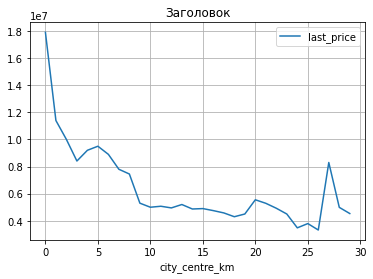

In [63]:
# построим линейную диаграмму для визуализации динамики цены относительно удаленности.
data_spb.groupby('city_centre_km')['last_price'].median().plot(grid=True, legend=True, title = 'Заголовок')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай сделаем проект сильнее, и по этой сводной таблице построим линейную или столбчатую диграмму для визуализации динамики цены относительно удалённости?
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличная визуализация. В твой код добавил заголовок, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

Стоимость объекта, что неудивительно, уменьшается по мере удаленности от центра.

### Общий вывод

Какие же можно сделать выводы? Они очень логичны и полностью совпадают с тем, что подсказывает здравый смысл. Естественно, чем больше площадь, тем больше цена, с характерными выбросами за дорогие предложения с большой площадью. Цена постепенно растет с увеличением комнат. Также, цена за квартиры на промежуточных этажах в среднем намного выше, чем на первом и последнем этажах. Средняя стоимость квартиры в Петербурге увеличивается по мере приближенности к центру и выше, чем в пригородах, а в пригородах выше, чем в Выборге (далеко от Санкт-Петербурга). 

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Давай немного увеличим объем вывода, он получился скудным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 

---

Также обязательно написать об основных результатах исследования    
    
---    
    
Так же после исследования, бизнесу нужны будут рекомендации.

<div class="alert alert-info"> <b>Выводы: </b>Была проведена исследовательская работа по архиву о продаже квартир в Санкт-Петербурге и Леноблости за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Была проведена первичная обработка данных, заполнены пустые значения и изменены типы данных, там где это логически необходимо, оптимизированы типы населенных пунктов для облегчения поиска по названию и обработаны аномалии и слишком выдающиеся значения в данных. Также были созданы новые столбцы данных на основе уже существующих для облегчения анализа. Был проведен исследовательский анализ данных, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. </div> 

 <div class="alert alert-info"> <b></b>Какие наблюдения можно сделать? Общая площадь чаще всего в районе 40-50ти метров, жилая - 25 метров, площадь кухни - 9 метров. Основной массив цен - до 6 миллионов. Большинство объявлений с однокомнатными квартирами, далее идут 2х, 3х и 4х комнатные квартиры. Высота потолка чаще всего - 2.5 метров. Этаж чаще всего 2 или 3ий, большинство предложений сосредоточены на промежуточных этажах, не первом и не последнем. По общему колличеству этажей видно, что большинство объявлений в 5-этажных домах. Большинство объявлений говорят о близости парков в 500 метрах, аэропортов в 20000, центра города в 10-15 км. Чаще размещают объявления в будние дни. Также видно снижение активности в январе (из-за новогодних праздников), мае (вероятно из-за майских праздников) и летних месяцах. Пики приходятся на февраль-апрель и сентябрь-ноябрь.</div> 

<div class="alert alert-info"> <b></b>Цена зависит от общей и жилой площади, но не от площади кухни. При увеличении комнат с 1 до 3 цена растет, после - увеличение числа комнат уже не так влияет на цену. Цена в среднем ниже в объявлениях с первым этажом. Корреляция между днем недели подачи объявления и ценой отсутствует. То же верно для месяца и года. Средняя стоимость квартиры в Петербурге увеличивается по мере приближенности к центру и выше, чем в пригородах, а в пригородах выше, чем в Выборге (далеко от Санкт-Петербурга).</div> 

<div class="alert alert-info"> <b>Рекомендации: </b>Разработка алгоритма определения рыночной цены очень перспективна и определенно принесет большую прибыль. Основные параметры установленны и рекомендуется также приступить к построению автоматезированой среды для отслеживания аномалий и мошенеческой деятельности.</div> 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Шикарный вывод, супер!) Все четко и лаконично)
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:



1) Типы данных

2) Проверка на дубликаты

3) Какие продажи можно считать быстрыми, а какие — необычно долгими?

4) Построить графики scatter + день / месяц / год

5) Корреляция Пирсона

6) В последнем шаге добавить линейную или столбчатую диаграмму

7) Финальный вывод

8) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

9) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод